# Demo for testing

In [1]:
%matplotlib notebook
from utils import Args, get_encoder, ImageDescriptor, plot_loss
from build_vocab import Vocabulary
from random import randint
import matplotlib.pyplot as plt

### Load model at `epoch=7`
**NOTE**: Please make sure you assign a correct model directory `model_dir` and name of checkpoint `checkpoint`.

In [2]:
args = Args(encoder='resnet', encoder_ver=101, mode='test', attention=True, plot=True, model_dir='../models', checkpoint='resnet101-epoch-7.ckpt')

for key, val in vars(args).items():
    print(f'{key}: {val}')

log_step: 10
save_step: 1000
embed_size: 256
hidden_size: 512
crop_size: 224
num_layers: 1
num_epochs: 5
batch_size: 128
num_workers: 2
learning_rate: 0.001
encoder: resnet
encoder_ver: 101
mode: test
attention: True
caption: False
model_dir: ../models
checkpoint: resnet101-epoch-7.ckpt
vocab_path: ../data/vocab.pkl
image_path: ../png/example.png
plot: True
image_dir: ../data/resized2014
validate_when_training: False
caption_path: ../data/annotations/captions_train2014.json


In [3]:
model = ImageDescriptor(args, encoder=get_encoder(args))

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!
Load from ../models/resnet101-epoch-7.ckpt.


### Test on validation set and calculate the `BLEU` socre
[What is BLEU](https://en.wikipedia.org/wiki/BLEU)  
Test for 5 images of validation set.

**NOTE**: Make sure you have resized images of validation set in `../data/resized2014/`.

<IPython.core.display.Javascript object>


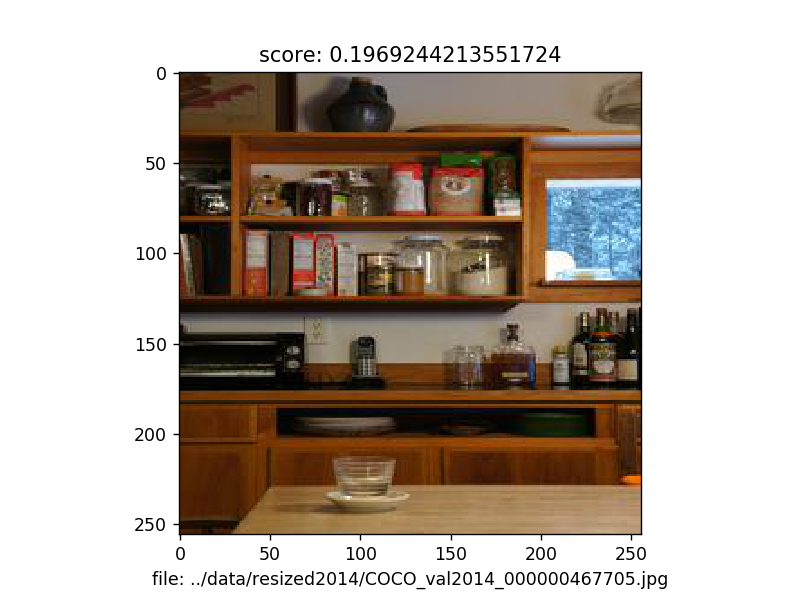

Sampled caption:
['a', 'cluttered', 'desk', 'with', 'a', 'computer', 'and', 'a', 'laptop']
COCO caption:
['A', 'kitchen', 'filled', 'with', 'bottles', 'on', "it's", 'counters', 'and', 'lots', 'of', 'counter', 'space.']


<IPython.core.display.Javascript object>


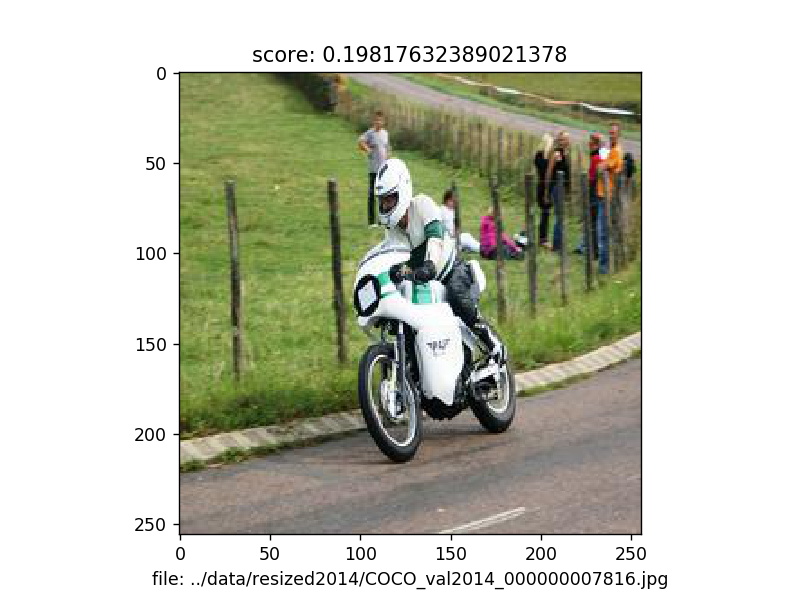

Sampled caption:
['a', 'man', 'riding', 'a', 'motorcycle', 'down', 'a', 'street']
COCO caption:
['A', 'person', 'on', 'a', 'motor', 'bike', 'on', 'a', 'road.']


<IPython.core.display.Javascript object>


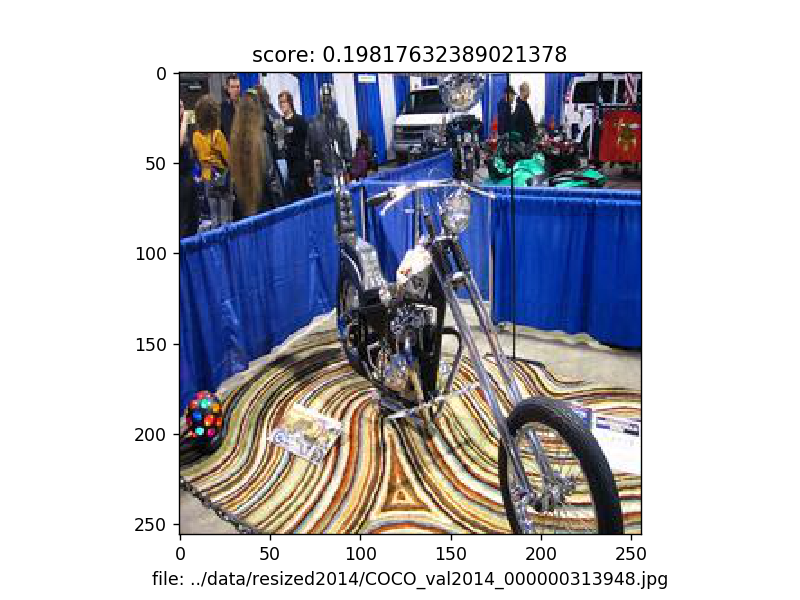

Sampled caption:
['a', 'group', 'of', 'people', 'sitting', 'on', 'a', 'motorcycle']
COCO caption:
['A', 'motorcycle', 'is', 'on', 'display', 'at', 'a', 'convention.']


<IPython.core.display.Javascript object>


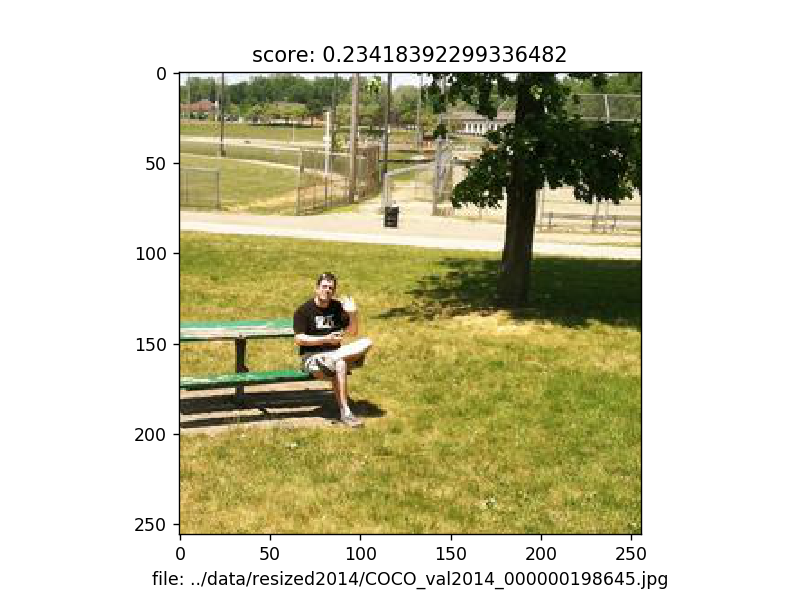

Sampled caption:
['a', 'man', 'sitting', 'on', 'a', 'bench', 'in', 'a', 'park']
COCO caption:
['A', 'man', 'waving', 'from', 'a', 'bench', 'next', 'to', 'a', 'baseball', 'diamond']


<IPython.core.display.Javascript object>


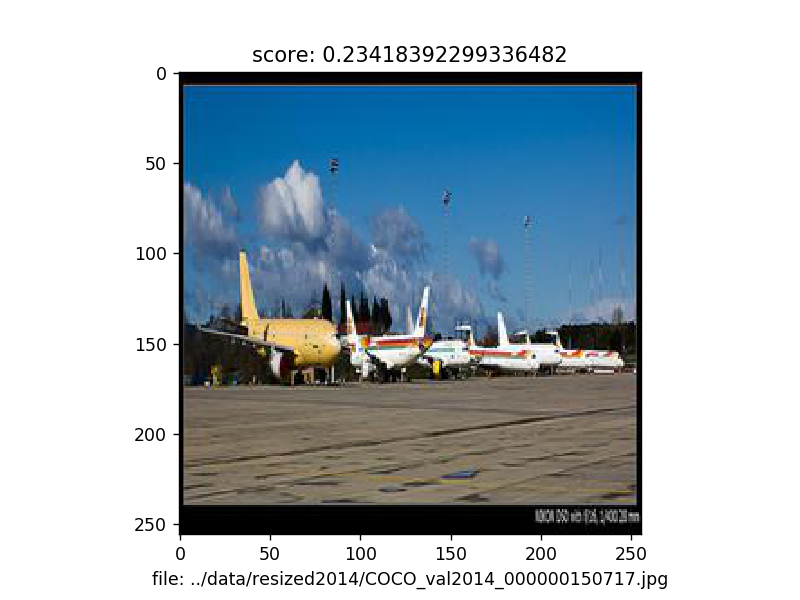

Sampled caption:
['a', 'group', 'of', 'airplanes', 'are', 'parked', 'in', 'a', 'lot']
COCO caption:
['A', 'group', 'of', 'planes', 'sit', 'on', 'the', 'tarmac', 'at', 'an', 'airport.']


In [4]:
for _ in range(5):
    model.bleu_score(randint(1,40000), plot=True, show_caption=True)

### Average `BLEU` score of samples from validation set

In [5]:
def avg_bleu(m, n=500):
    count = 0
    score = 0
    while count < n:
        tmp = m.bleu_score(randint(0,40000))
        if not tmp:
            continue
        score += tmp
        count += 1
    return score/n

In [6]:
n = 500
print(f'Average BLEU score of {n} images: {avg_bleu(model, n):.4f}')

Average BLEU score of 500 images: 0.1997


### Test images that are captured in our life

<IPython.core.display.Javascript object>


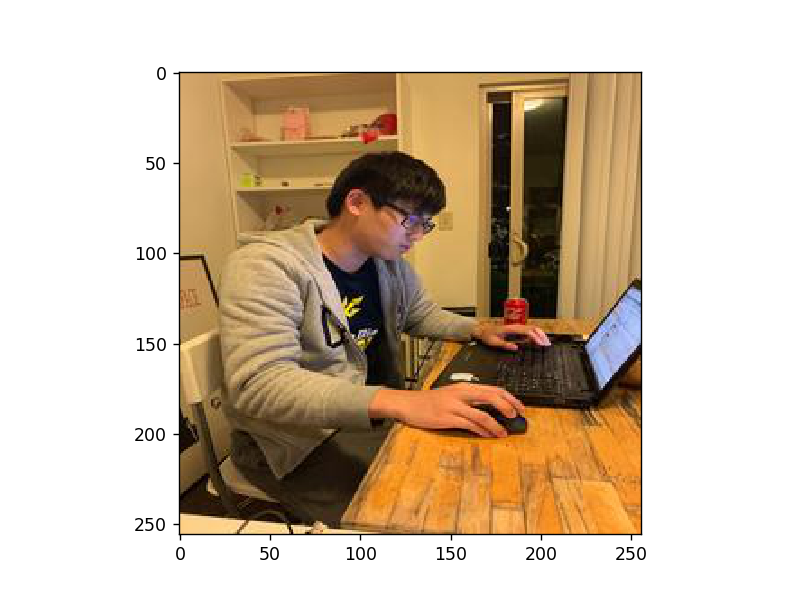

a man sitting at a desk working on a laptop .


In [7]:
plt.figure()
model.test(image_path='../png/test_01_resize.jpg', plot=True)

<IPython.core.display.Javascript object>


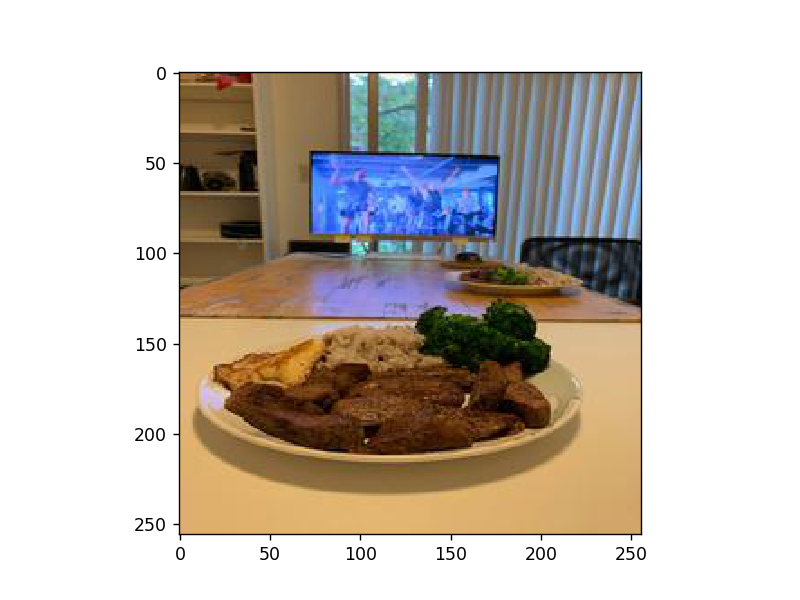

a plate of food with a fork and a plate of food


In [8]:
plt.figure()
model.test(image_path='../png/test_02_resize.jpg', plot=True)

<IPython.core.display.Javascript object>


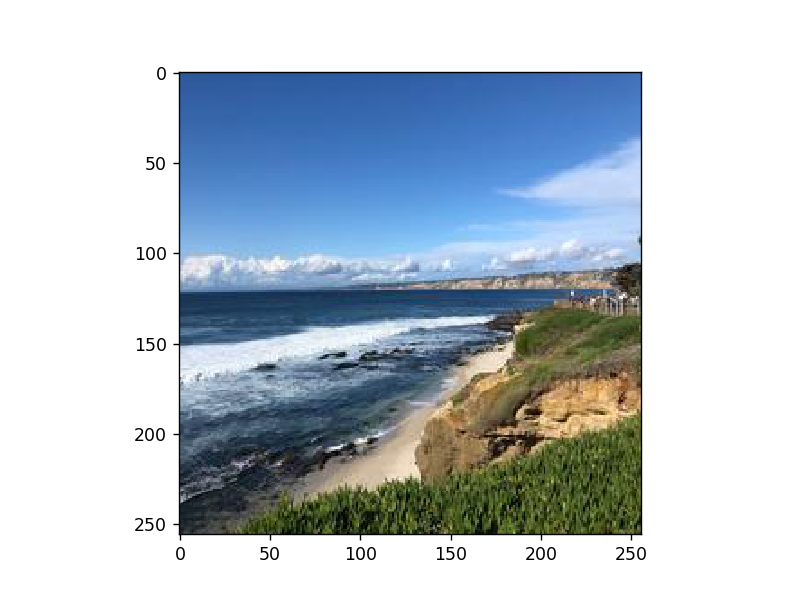

a bench sitting on a beach next to the ocean .


In [9]:
plt.figure()
model.test(image_path='../png/test_03_resize.jpg', plot=True)

<IPython.core.display.Javascript object>


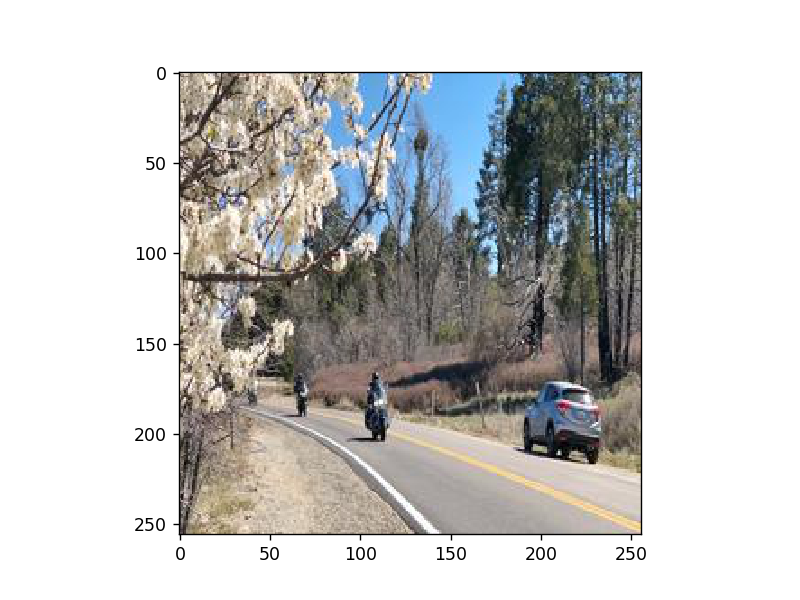

a motorcycle is driving down the road with a car behind them .


In [10]:
plt.figure()
model.test(image_path='../png/test_04_resize.jpg', plot=True)